## Pumpkin Pricing

Load up required libraries and dataset. Convert the data to a dataframe containing a subset of the data: 

- Only get pumpkins priced by the bushel
- Convert the date to a month
- Calculate the price to be an average of high and low prices
- Convert the price to reflect the pricing by bushel quantity

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

pumpkins = pd.read_csv('./pumpkins.csv')

pumpkins.head()


City Name Type       Package      Variety Sub Variety  Grade     Date  \
0  BALTIMORE  NaN  24 inch bins          NaN         NaN    NaN  4/29/17   
1  BALTIMORE  NaN  24 inch bins          NaN         NaN    NaN   5/6/17   
2  BALTIMORE  NaN  24 inch bins  HOWDEN TYPE         NaN    NaN  9/24/16   
3  BALTIMORE  NaN  24 inch bins  HOWDEN TYPE         NaN    NaN  9/24/16   
4  BALTIMORE  NaN  24 inch bins  HOWDEN TYPE         NaN    NaN  11/5/16   

   Low Price  High Price  Mostly Low  ...  Unit of Sale Quality Condition  \
0      270.0       280.0       270.0  ...           NaN     NaN       NaN   
1      270.0       280.0       270.0  ...           NaN     NaN       NaN   
2      160.0       160.0       160.0  ...           NaN     NaN       NaN   
3      160.0       160.0       160.0  ...           NaN     NaN       NaN   
4       90.0       100.0        90.0  ...           NaN     NaN       NaN   

  Appearance Storage  Crop Repack  Trans Mode  Unnamed: 24  Unnamed: 25  
0        NaN     NaN   NaN      E         NaN          NaN          NaN  
1        NaN     NaN   NaN      E         NaN          NaN          NaN  
2        NaN     NaN   NaN      N         NaN          NaN          NaN  
3        NaN     NaN   NaN      N         NaN          NaN          NaN  
4        NaN     NaN   NaN      N         NaN          NaN          NaN  

[5 rows x 26 columns]

In [50]:

pumpkins = pumpkins[pumpkins['Package'].str.contains('bushel', case=True, regex=True)]

new_columns = ['Package', 'Variety', 'City Name', 'Month', 'Low Price', 'High Price', 'Date', 'City Num', 'Variety Num']


pumpkins = pumpkins.drop([c for c in pumpkins.columns if c not in new_columns], axis=1)

price = (pumpkins['Low Price'] + pumpkins['High Price']) / 2

month = pd.DatetimeIndex(pumpkins['Date']).month


new_pumpkins = pd.DataFrame({'Month': month, 'Variety': pumpkins['Variety'], 'City': pumpkins['City Name'], 'Package': pumpkins['Package'], 'Low Price': pumpkins['Low Price'],'High Price': pumpkins['High Price'], 'Price': price})

new_pumpkins.loc[new_pumpkins['Package'].str.contains('1 1/9'), 'Price'] = price/1.1

new_pumpkins.loc[new_pumpkins['Package'].str.contains('1/2'), 'Price'] = price*2

new_pumpkins.head()


Month   Variety       City               Package  Low Price  High Price  \
70      9  PIE TYPE  BALTIMORE  1 1/9 bushel cartons       15.0        15.0   
71      9  PIE TYPE  BALTIMORE  1 1/9 bushel cartons       18.0        18.0   
72     10  PIE TYPE  BALTIMORE  1 1/9 bushel cartons       18.0        18.0   
73     10  PIE TYPE  BALTIMORE  1 1/9 bushel cartons       17.0        17.0   
74     10  PIE TYPE  BALTIMORE  1 1/9 bushel cartons       15.0        15.0   

        Price  
70  13.636364  
71  16.363636  
72  16.363636  
73  15.454545  
74  13.636364

A basic scatterplot reminds us that we only have month data from August through December. We probably need more data to be able to draw conclusions in a linear fashion.

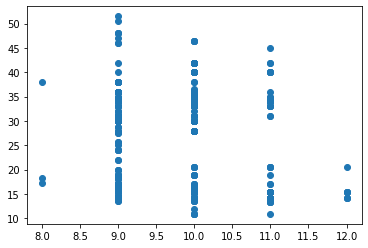

In [51]:
import matplotlib.pyplot as plt
plt.scatter('Month','Price',data=new_pumpkins)

Beginning of my code:

In [52]:
from sklearn.preprocessing import LabelEncoder

new_pumpkins.iloc[:, 0:-1] = new_pumpkins.iloc[:, 0:-1].apply(LabelEncoder().fit_transform)

In [53]:
new_pumpkins

Month  Variety  City  Package  Low Price  High Price      Price
70        1        3     1        0          5           3  13.636364
71        1        3     1        0         10           7  16.363636
72        2        3     1        0         10           7  16.363636
73        2        3     1        0          9           6  15.454545
74        2        3     1        0          5           3  13.636364
...     ...      ...   ...      ...        ...         ...        ...
1738      1        1     9        2          5           3  30.000000
1739      1        1     9        2          3           3  28.750000
1740      1        1     9        2          0           3  25.750000
1741      1        1     9        2          1           0  24.000000
1742      1        1     9        2          1           0  24.000000

[415 rows x 7 columns]

In [54]:
print(new_pumpkins['City'].corr(new_pumpkins['Price']))
print(new_pumpkins['Package'].corr(new_pumpkins['Price']))

0.32363971816089215
0.6061712937226045


Package and Price have a hgiher correlation coefficient, suggesting a relationship between the two features

In [55]:
new_pumpkins.dropna(inplace=True) # clean up the dataframe

In [56]:
new_pumpkins.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 415 entries, 70 to 1742
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Month       415 non-null    int64  
 1   Variety     415 non-null    int32  
 2   City        415 non-null    int32  
 3   Package     415 non-null    int32  
 4   Low Price   415 non-null    int64  
 5   High Price  415 non-null    int64  
 6   Price       415 non-null    float64
dtypes: float64(1), int32(3), int64(3)
memory usage: 37.2 KB


In [57]:
new_columns = ['Package', 'Price']
lin_pumpkins = new_pumpkins.drop([c for c in new_pumpkins.columns if c not in new_columns], axis='columns')

lin_pumpkins # lin_pumkins has just the features we want

Package      Price
70          0  13.636364
71          0  16.363636
72          0  16.363636
73          0  15.454545
74          0  13.636364
...       ...        ...
1738        2  30.000000
1739        2  28.750000
1740        2  25.750000
1741        2  24.000000
1742        2  24.000000

[415 rows x 2 columns]

In [58]:
X = lin_pumpkins.values[:, :1]
y = lin_pumpkins.values[:, 1:2]

In [59]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)

pred = lin_reg.predict(X_test)

accuracy_score = lin_reg.score(X_train,y_train)
print('Model Accuracy: ', accuracy_score)

Model Accuracy:  0.3315342327998987


Accuracy subpar ==> this is becuase low cerrelation

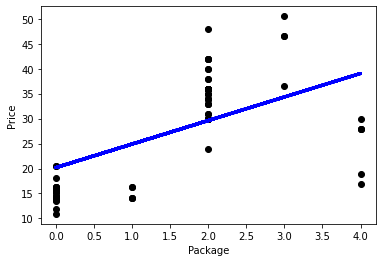

In [60]:
plt.scatter(X_test, y_test,  color='black')
plt.plot(X_test, pred, color='blue', linewidth=3)

plt.xlabel('Package')
plt.ylabel('Price')

plt.show()

In [61]:
lin_reg.predict( np.array([ [2.75] ]) )

array([[33.15655975]])

In [62]:
lin_reg.predict( np.array([ [1] ]) )

array([[24.91239287]])

In [63]:
lin_reg.predict( np.array([ [3.5] ]) )

array([[36.68977412]])

For the results of the model, those numbers are logical

In [64]:
new_columns = ['Variety', 'Package', 'City', 'Month', 'Price']
poly_pumpkins = new_pumpkins.drop([c for c in new_pumpkins.columns if c not in new_columns], axis='columns')

print(poly_pumpkins)

      Month  Variety  City  Package      Price
70        1        3     1        0  13.636364
71        1        3     1        0  16.363636
72        2        3     1        0  16.363636
73        2        3     1        0  15.454545
74        2        3     1        0  13.636364
...     ...      ...   ...      ...        ...
1738      1        1     9        2  30.000000
1739      1        1     9        2  28.750000
1740      1        1     9        2  25.750000
1741      1        1     9        2  24.000000
1742      1        1     9        2  24.000000

[415 rows x 5 columns]


In [65]:
corr = poly_pumpkins.corr()
corr.style.background_gradient(cmap='coolwarm')

Best Correlation: Package and Price
Worst Correlation: Price and Variety

In [66]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

X=poly_pumpkins.iloc[:,3:4].values
y=poly_pumpkins.iloc[:,4:5].values

pipeline = make_pipeline(PolynomialFeatures(4), LinearRegression())

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

pipeline.fit(np.array(X_train), y_train)

y_pred=pipeline.predict(X_test)

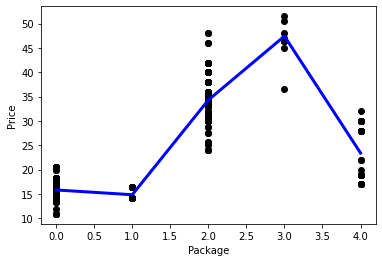

In [67]:
df = pd.DataFrame({'x': X_test[:,0], 'y': y_pred[:,0]})
df.sort_values(by='x',inplace = True)
points = pd.DataFrame(df).to_numpy()

plt.plot(points[:, 0], points[:, 1],color="blue", linewidth=3)
plt.xlabel('Package')
plt.ylabel('Price')
plt.scatter(X,y, color="black")
plt.show()

Hey! That looks better than the linear version

In [68]:
accuracy_score = pipeline.score(X_train,y_train)
print('Model Accuracy: ', accuracy_score)

Model Accuracy:  0.8537946517073784


In [69]:
# Nice!

pipeline.predict( np.array([[1.5]]))

array([[23.59732741]])

In [70]:
pipeline.predict( np.array([[0.5]]))

array([[11.26994743]])

Pretty Good. Of course not perfect since our correlation coeff. was 0.85 (and not 1) but I think that that is within reasonable accuracy

Assignment:

In [87]:
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split

In [94]:
X, y = load_diabetes(return_X_y=True, as_frame=True)

X

age       sex       bmi        bp        s1        s2        s3  \
0    0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1   -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2    0.085299  0.050680  0.044451 -0.005671 -0.045599 -0.034194 -0.032356   
3   -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4    0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   
..        ...       ...       ...       ...       ...       ...       ...   
437  0.041708  0.050680  0.019662  0.059744 -0.005697 -0.002566 -0.028674   
438 -0.005515  0.050680 -0.015906 -0.067642  0.049341  0.079165 -0.028674   
439  0.041708  0.050680 -0.015906  0.017282 -0.037344 -0.013840 -0.024993   
440 -0.045472 -0.044642  0.039062  0.001215  0.016318  0.015283 -0.028674   
441 -0.045472 -0.044642 -0.073030 -0.081414  0.083740  0.027809  0.173816   

           s4        s5        s6  
0   -0.002592  0.019908 -0.017646  
1   -0.039493 -0.068330 -0.092204  
2   -0.002592  0.002864 -0.025930  
3    0.034309  0.022692 -0.009362  
4   -0.002592 -0.031991 -0.046641  
..        ...       ...       ...  
437 -0.002592  0.031193  0.007207  
438  0.034309 -0.018118  0.044485  
439 -0.011080 -0.046879  0.015491  
440  0.026560  0.044528 -0.025930  
441 -0.039493 -0.004220  0.003064  

[442 rows x 10 columns]

In [96]:
corr = X.corrwith(y)
corr

age    0.187889
sex    0.043062
bmi    0.586450
bp     0.441484
s1     0.212022
s2     0.174054
s3    -0.394789
s4     0.430453
s5     0.565883
s6     0.382483
dtype: float64

Good Correlation with s5

Our model with take in s5 data.

In [111]:
X, y = load_diabetes(return_X_y=True, as_frame=False) # relaod data not as frame

X = X[:, np.newaxis, 8]

X

array([[ 0.01990842],
       [-0.06832974],
       [ 0.00286377],
       [ 0.02269202],
       [-0.03199144],
       [-0.04118039],
       [-0.06291295],
       [-0.03581673],
       [-0.01495648],
       [ 0.06773633],
       [-0.06291295],
       [-0.09643322],
       [-0.03075121],
       [ 0.03839325],
       [-0.03199144],
       [ 0.03605579],
       [ 0.05228   ],
       [ 0.02736771],
       [-0.01811827],
       [-0.00894402],
       [-0.01190068],
       [-0.07212845],
       [-0.0611766 ],
       [ 0.13359898],
       [-0.02595242],
       [ 0.01919903],
       [-0.0425721 ],
       [-0.01599827],
       [-0.00060925],
       [ 0.0594238 ],
       [-0.02712865],
       [-0.03712835],
       [ 0.00027149],
       [-0.01811827],
       [-0.0594727 ],
       [ 0.02131085],
       [ 0.054724  ],
       [ 0.01703713],
       [ 0.07142403],
       [ 0.01919903],
       [ 0.01255315],
       [-0.04986847],
       [-0.00991896],
       [-0.0425721 ],
       [ 0.03243323],
       [-0

In [112]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=25)

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [113]:
# Make predictions
y_pred = model.predict(X_test)

In [114]:
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))

Coefficient of determination: 0.29


That's... not the best. I think that is becuase our correlation was only 0.56

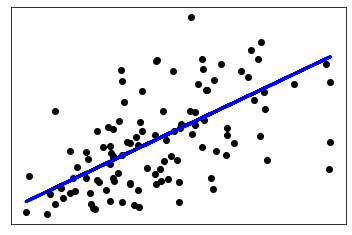

In [115]:
plt.scatter(X_test, y_test, color="black")
plt.plot(X_test, y_pred, color="blue", linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

As our correlation was not perfect, there is some datapoints from from our line. Our inaccuracy stems from the low correlation coefficient. I chose the technique I did as it allowed me to easily plot the data, and test the data.